Epoch 1/20, Loss: 0.5019
Epoch 2/20, Loss: 0.2232
Epoch 3/20, Loss: 0.0670
Epoch 4/20, Loss: 0.1065
Epoch 5/20, Loss: 0.0997
Epoch 6/20, Loss: 0.0952
Epoch 7/20, Loss: 0.0404
Epoch 8/20, Loss: 0.1224
Epoch 9/20, Loss: 0.0482
Epoch 10/20, Loss: 0.0191
Epoch 11/20, Loss: 0.0244
Epoch 12/20, Loss: 0.0241
Epoch 13/20, Loss: 0.0293
Epoch 14/20, Loss: 0.0557
Epoch 15/20, Loss: 0.0291
Epoch 16/20, Loss: 0.0144
Epoch 17/20, Loss: 0.0087
Epoch 18/20, Loss: 0.0430
Epoch 19/20, Loss: 0.0270
Epoch 20/20, Loss: 0.0231
정확도: 0.9694444537162781


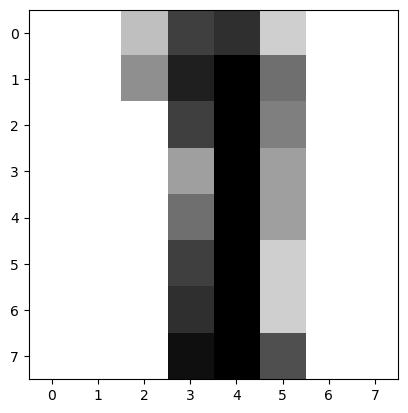

예측 결과: 1


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 및 전처리
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # (n_samples, 64)
labels = digits.target  # 정수형 라벨 그대로 사용

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# 3. DNN 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

model = DNN()

# 4. 손실함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. 학습
epochs = 20
batch_size = 32

for epoch in range(epochs):
    permutation = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]

        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 6. 평가
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).float().mean()
    print("정확도:", accuracy.item())

# 7. 예측 및 시각화
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

with torch.no_grad():
    pred = model(X_test[10].unsqueeze(0))  # (1, 64) 형태로 맞춤
    print("예측 결과:", torch.argmax(pred).item())
